In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [2]:
data=pd.read_csv("hour.csv")
df=data.copy()

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df=df.drop(['instant','casual','registered','atemp','holiday'],axis=1)

In [6]:
df.describe()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000


In [7]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [8]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [9]:
df['season']=df['season'].astype('category') #(1:winter, 2:spring, 3:summer, 4:fall) 
df['workingday']=df['workingday'].astype('category') #holiday is 1, otherwise is 0.
df['weathersit']=df['weathersit'].astype('category') #(1: Clear,2: Mist 3: Light Snow, 4: Heavy Rain )

No handles with labels found to put in legend.


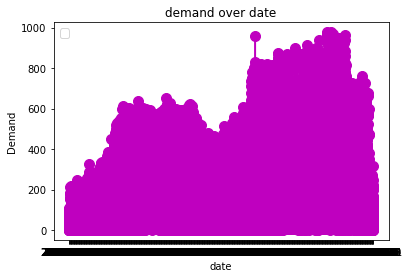

In [10]:
plt.title('demand over date')
plt.xlabel('date')
plt.ylabel('Demand')
plt.plot(df['dteday'],df['cnt'],color='m',marker='o',markersize=10)
plt.legend(loc=2, fontsize=12) 
plt.show()

No handles with labels found to put in legend.


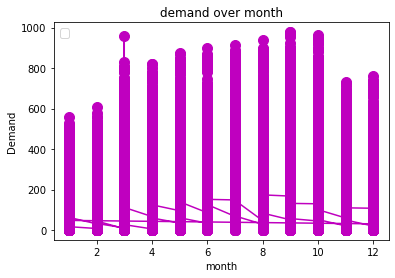

In [11]:
plt.title('demand over month')
plt.xlabel('month')
plt.ylabel('Demand')
plt.plot(df['mnth'],df['cnt'],color='m',marker='o',markersize=10)
plt.legend(loc=2, fontsize=12) 
plt.show()

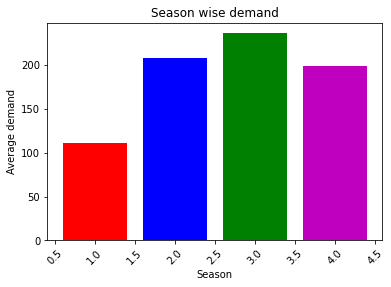

In [12]:
cat1=df['season'].unique()
avg1=df.groupby('season').mean()['cnt']
plt.title('Season wise demand')
plt.xlabel('Season')
plt.ylabel('Average demand')
plt.xticks(rotation='45')
plt.bar(cat1,avg1, color=(['r','b','g','m']))
plt.show()

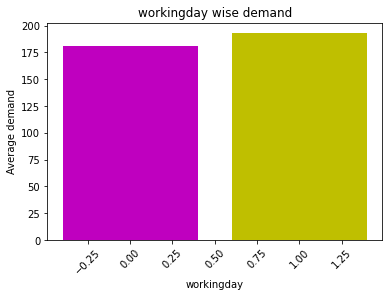

In [13]:
cat3=df['workingday'].unique()
avg3=df.groupby('workingday').mean()['cnt']
plt.title('workingday wise demand')
plt.xlabel('workingday')
plt.ylabel('Average demand')
plt.xticks(rotation='45')
plt.bar(cat3,avg3, color=(['m','y']))
plt.show()

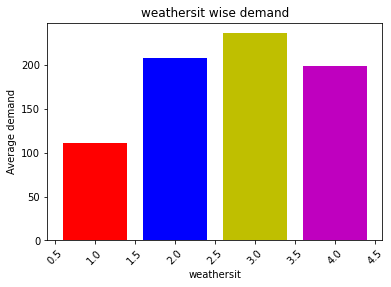

In [14]:
cat4=df['weathersit'].unique()
avg4=df.groupby('weathersit').mean()['cnt']
plt.title('weathersit wise demand')
plt.xlabel('weathersit')
plt.ylabel('Average demand')
plt.xticks(rotation='45')
plt.bar(cat1,avg1, color=(['r','b','y','m']))
plt.show()

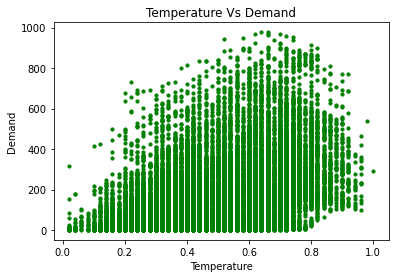

In [15]:
plt.title("Temperature Vs Demand")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.scatter(df['temp'],df['cnt'], marker='o', s=10, c='g')
plt.show()

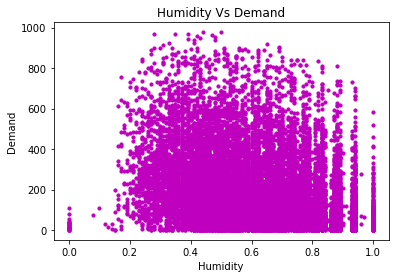

In [16]:
plt.title("Humidity Vs Demand")
plt.xlabel("Humidity")
plt.ylabel("Demand")
plt.scatter(df['hum'],df['cnt'], marker='o', s=10, c='m')
plt.show()

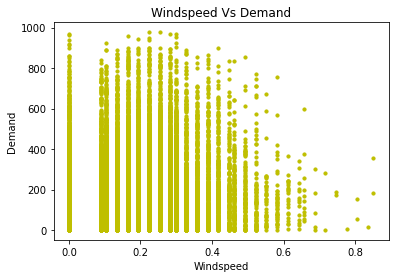

In [17]:
plt.title("Windspeed Vs Demand")
plt.xlabel("Windspeed")
plt.ylabel("Demand")
plt.scatter(df['windspeed'],df['cnt'], marker='o', s=10, c='y')
plt.show()

In [18]:
cor=df.corr()
cor

,yr,mnth,hr,weekday,temp,hum,windspeed,cnt
yr,1.000000,-0.010473,-0.003867,-0.004485,0.040913,-0.083546,-0.008740,0.250495
mnth,-0.010473,1.000000,-0.005772,0.010400,0.201691,0.164411,-0.135386,0.120638
hr,-0.003867,-0.005772,1.000000,-0.003498,0.137603,-0.276498,0.137252,0.394071
weekday,-0.004485,0.010400,-0.003498,1.000000,-0.001795,-0.037158,0.011502,0.026900
temp,0.040913,0.201691,0.137603,-0.001795,1.000000,-0.069881,-0.023125,0.404772
hum,-0.083546,0.164411,-0.276498,-0.037158,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.008740,-0.135386,0.137252,0.011502,-0.023125,-0.290105,1.000000,0.093234
cnt,0.250495,0.120638,0.394071,0.026900,0.404772,-0.322911,0.093234,1.000000


<AxesSubplot:>

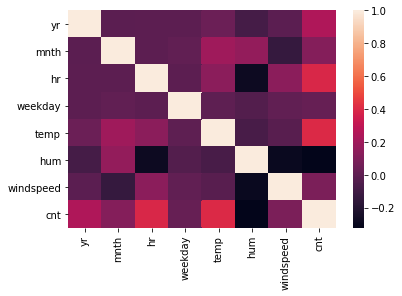

In [19]:
sns.heatmap(cor)

In [20]:
df=df.drop(['windspeed','weekday'],axis=1)

In [21]:
df['cnt'].quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

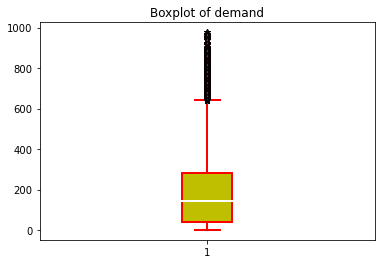

In [22]:
plt.title('Boxplot of demand')
plt.boxplot(df['cnt'],patch_artist=True,boxprops=dict(facecolor='y',color='r',linewidth=2),whiskerprops=dict(color='r',linewidth=2),medianprops=dict(color='w',linewidth=2),
           capprops=dict(color='r',linewidth=2),flierprops=dict(markerfacecolor='r',marker='*',markersize=7))
plt.show()

In [23]:
DW=durbin_watson(df['cnt'])
DW

0.14937921088923317

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x150e6ec1940>)

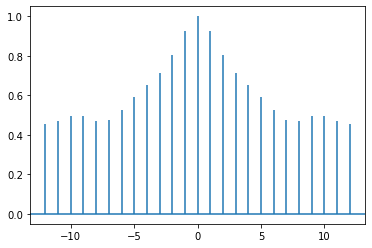

In [24]:
df1=pd.to_numeric(df['cnt'],downcast='float')
plt.acorr(df1,maxlags=12)

<AxesSubplot:>

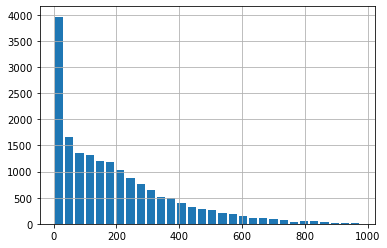

In [25]:
plt.figure()
df['cnt'].hist(rwidth=0.8, bins=30)

<AxesSubplot:>

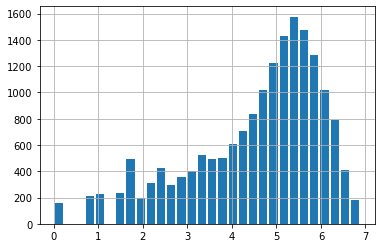

In [26]:
df['cnt']=np.log(df['cnt'])
plt.figure()
df['cnt'].hist(rwidth=0.8, bins=30)

In [27]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'workingday', 'weathersit',
       'temp', 'hum', 'cnt'],
      dtype='object')

In [28]:
DW1=durbin_watson(df['cnt'])
DW1

0.02127906770741894

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.87938637, 0.8795129 , 0.87978953, 0.8806704 , 0.8828182 ,
        0.8876991 , 0.8959399 , 0.9075406 , 0.92387384, 0.9453945 ,
        0.96914274, 0.9893315 , 1.        , 0.9893315 , 0.96914274,
        0.9453945 , 0.92387384, 0.9075406 , 0.8959399 , 0.8876991 ,
        0.8828182 , 0.8806704 , 0.87978953, 0.8795129 , 0.87938637],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x150e8442910>)

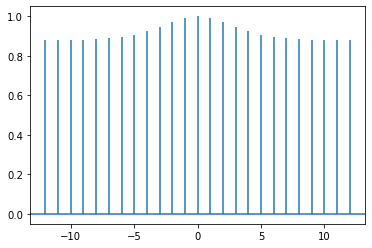

In [29]:
df1=pd.to_numeric(df['cnt'],downcast='float')
plt.acorr(df1,maxlags=12)

In [30]:
d1=df['cnt'].shift(+1).to_frame()
d1.columns=['t-1']

In [31]:
d2=df['cnt'].shift(+2).to_frame()
d2.columns=['t-2']

In [32]:
d3=df['cnt'].shift(+3).to_frame()
d3.columns=['t-3']

In [33]:
d_lag=pd.concat([df,d1,d2,d3], axis=1)

In [34]:
d_lag=d_lag.dropna()

In [35]:
d_lag

,dteday,season,yr,mnth,hr,workingday,weathersit,temp,hum,cnt,t-1,t-2,t-3
3,2011-01-01,1,0,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,2011-01-01,1,0,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,2011-01-01,1,0,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,2011-01-01,1,0,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,2011-01-01,1,0,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,1,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,2012-12-31,1,1,12,20,1,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,2012-12-31,1,1,12,21,1,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,2012-12-31,1,1,12,22,1,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [36]:
x=d_lag.drop(['cnt','dteday'],axis=1)
y=d_lag['cnt']

In [37]:
d_lag=pd.get_dummies(d_lag, drop_first=True)

In [38]:
tr_size=0.7*len(x)
tr_size=int(tr_size)

In [39]:
x_train=x[0:tr_size]
x_test=x[tr_size:len(x)]

In [40]:
y_train=y[0:tr_size]
y_test=y[tr_size:len(y)]

In [41]:
x_train
y_train=y_train.astype(np.float64)

In [42]:
x_train.shape

(12163, 11)

In [43]:
y_train.shape

(12163,)

In [44]:
model=LinearRegression()

In [45]:
model1=model.fit(x_train,y_train)

In [46]:
y_pred=model1.predict(x_test)

In [47]:
rmse=math.sqrt(mean_squared_error(y_test,y_pred))

In [48]:
rmse

0.4709821322125813

In [49]:
r2_train=model.score(x_train,y_train)
r2_test=model.score(x_test,y_test)

In [50]:
r2_train

0.8655827739609785

In [51]:
r2_test

0.8910609501643963

In [52]:
ePY=np.exp(y_pred)
eY=np.exp(y_test)

In [53]:
log_a=np.log(eY+1)
log_p=np.log(ePY+1)

In [54]:
log_sum_sq=0
log_diff=(log_p-log_a)**2
log_sum_sq=sum(log_diff)

In [57]:
RMLSE=np.sqrt(log_sum_sq/len(y_test))

In [58]:
RMLSE

0.445541525534207